In [2]:
%run -i webclass
latex.matrix_delimiters("[", "]")

# PageRank Project

Read the **Introduction to PageRank** Cocalc handout *and* the included article by David Austin. You must read both (the personalization vector is described in the handout but not in the article). The handout also explains how to use the `Web` class. When you write up answers to the questions posed in each part, your answers should be written in English using complete sentences. Compose these answers in Markdown cells (such as this one).

**It is fine to cut, paste and alter code that I have provided; however, you should delete any data, computations, or information that's not relevant to the problem/discussion at hand!**

## Problem A

Consider the four page web below.

![Part A](4pageweb.png)

- Define this web diagram as Web `WDA` and display it.
- Display the hyperlink matrix for `WDA`.
- Find the PageRank vector using the hyperlink matrix.
- Do you think the PageRanks of these pages make sense, given the structure of the link diagram? Why or why not?

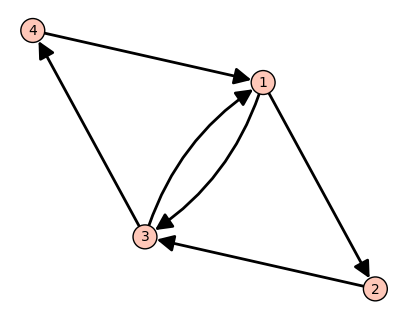

[  0   0 1/2   1]
[1/2   0   0   0]
[1/2   1   0   0]
[  0   0 1/2   0]

k = 0  :  (0.2500, 0.2500, 0.2500, 0.2500) (the initial state vector)
k = 200  :  (0.3333, 0.1667, 0.3333, 0.1667)


In [3]:
WD1 = Web({1: [3,2], 2: [3], 3: [4,1], 4: [1]})
WD1.show()
show(WD1.H)
print('k = 0  : ', WD1.pagerank('hyperlink', 'default', 0, precision=4), '(the initial state vector)')
print('k = 200  : ', WD1.pagerank('hyperlink', 'default', 200, precision=4))

The last PageRank vector showed suggested that the page 1 and 3 have higher rankings than page 2 and 4. This makes sense because page 1 and 3 were both cited twice, and page 2 and 4 were only cited once. This is also consistent with the corresponding matrix.

## Problem B

Let's re-rank the pages in `WDA` using two versions of the Google matrix.
* Compute the PageRank vector for web `WDA` using the standard Google matrix. Compare your results to **Problem A**. Does the rank order of the pages change? Do the values in the PageRank vector change? Can you explain the changes, and do they make sense?
* Compute the PageRank vector for web `WDA` using a Google matrix with standard $\alpha$ value ($\alpha = .85$) and personalization vector $$\mathbf{PB} = \left[ \begin{array}{c} 1/3 \\ 1/3 \\ 1/3 \\ 0 \end{array} \right].$$ Compare your results to **Problem A**. Does the rank order of the pages change? Do the values in the PageRank vector change? Can you explain the changes, and do they make sense?

In [11]:
WD1.pagerank('google','default', 200, verbose=False, precision=5)

(0.32456, 0.17544, 0.32456, 0.17544)

Google algorithm considers the probability of user randomly picking the page, whereas the hyperlink ranking do not. This makes sense because the google algorithm contribute the importance of the linked page to the page itself, so certain importance of page 1 is added to page 2 since page 1 links to 2, that's why we see the increase in importance of page 2. The same algorithm applies to page 3 and 4. Since the total has to add up to 1, the importance of page 1 and 3 decreased, but they stayed as two most important pages.

In [4]:
WD1.set_personalization_vector(vector(QQ, [1/3, 1/3, 1/3, 0]))
WD1.set_personalized_google_alpha(0.85)
WD1.pagerank('mygoogle', 'default', 200, verbose=False, precision=5)

(0.32144, 0.18661, 0.34523, 0.14672)

Yes, the values in the PageRank vector change. The personalization vector was set to [1/3, 1/3, 1/3, 0] which means there is probabilityy to random click on page 4. That is why page 3 became the most important page nowsince it is the only page that have access to page 4, and page 4 became the least important page because the only way to get there is to click on page 3.

## Problem C

Suppose we add a new page 5 to the web diagram defined in part A, with no links out, but add a link from page 4 to page 5.
- Define this new web diagram as `WDC` and display it.
- Compute the PageRank vector for `WDC` using the hyperlink matrix. Explain the result.
- Compute the PageRank vector for `WDC` using the dangling node fix. How did the addition of page 5 affect the rankings of the first four pages compared to the rankings of these pages from **Problem A**? (For example: why does page 1's importance decrease more than page 3's, etc?)
- Display the altered hyperlink matrix for `WDC`. Explain the meaning of the values that appear in the fifth column of this matrix (frame your answer in terms of a web surfer's behavior if they are currently on Page 5). Now suppose Page 5 is just a dead-end image link on Page 4. Can you suggest a better way to fill in the weights in the fifth column?

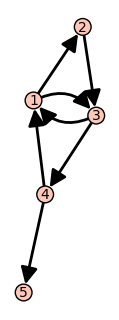

[  0   0 1/2 1/2   0]
[1/2   0   0   0   0]
[1/2   1   0   0   0]
[  0   0 1/2   0   0]
[  0   0   0 1/2   0]

In [51]:
WD2 = Web({1: [3,2], 2: [3], 3: [4,1], 4: [1, 5], 5: []})
WD2.show()
show(WD2.H)

There is one column that consist entirely of zeros; hence, the matrix is not a column stochastic matrix. The last column represents the webpage 5 where there is no link out.

In [56]:
WD2.pagerank('nodefix', 'default', 200)

(0.26087, 0.15217, 0.30435, 0.17391, 0.10870)

After dangling node fix, page 3 became the most important page and page 1 became the second most important. It is accurate because from page 3 you are able to get to page 4 and page 4 is the only page that directs to page 5. Page 4 is the third most important page because of the same reason.

In [55]:
show(WD2.AH)

[  0   0 1/2 1/2 1/5]
[1/2   0   0   0 1/5]
[1/2   1   0   0 1/5]
[  0   0 1/2   0 1/5]
[  0   0   0 1/2 1/5]

A better way to fill out the last column would be 
$\left[\begin{array}{c} 1/8 \\ 1/4 \\ 1/4 \\ 3/8 \\ 0 \end{array}\right]$. Since page 2 only points to page 3, page 2 and page 3 should have the same importance when considering page 5. Page 1 should have the least probability because it is the furtherest away from page 5; but it can also go to page 3 directly, so it should assign 1/2 of the importance of page 2 and page 3. Since the sum must be 1, using 1 - 1/8 - 1/4 - 1/4 to get the probability of page 4.

## Problem D

Consider the web diagram `WD1` in the first example from the Introduction to PageRank handout. The PageRank vector we found using the standard Google matrix was $$(0.06309,0.09253,0.04556,0.09740,0.1101,0.1841,0.1565,0.2508).$$ Suppose the owners of page 6 don't like that page 8 is ranked more highly than their page (they'd love to be ranked first). They want to try three different things to boost their PageRank relative to page 8. Each independent option alters the original web diagram `WD1` to create a new diagram. The options are:

1. Add one link from page 6 to page 5 and one link from page 6 to page 7 (no other new links) (`WDN1`).
2. Create three new pages 9, 10, and 11 that each have one link to page 6 (no other new links) (`WDN2`).
3. Create one new page 9 that links to 6 and also add a link from page 6 to page 9 (no other new links) (`WDN3`).

Now:

- Create and display each web diagram `WDN1, WDN2, WDN3`.
- Compute the PageRank vector for each web diagram using the standard Google matrix. Give the rank order of the pages from most to least important.
- Which method seems to work best? In giving your answer, be sure to discuss the effect of every option on the rankings of **all** of the original eight pages.

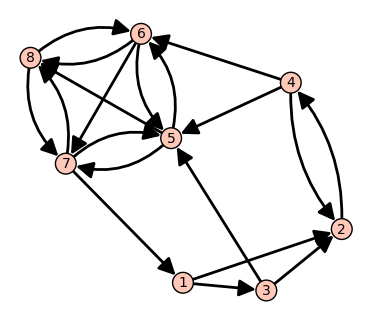

[  0   0   0   0   0   0 1/3   0]
[1/2   0 1/2 1/3   0   0   0   0]
[1/2   0   0   0   0   0   0   0]
[  0   1   0   0   0   0   0   0]
[  0   0 1/2 1/3   0 1/3 1/3   0]
[  0   0   0 1/3 1/3   0   0 1/2]
[  0   0   0   0 1/3 1/3   0 1/2]
[  0   0   0   0 1/3 1/3 1/3   0]

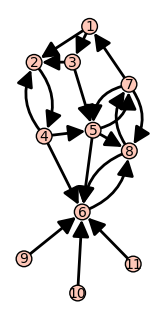

[  0   0   0   0   0   0 1/3   0   0   0   0]
[1/2   0 1/2 1/3   0   0   0   0   0   0   0]
[1/2   0   0   0   0   0   0   0   0   0   0]
[  0   1   0   0   0   0   0   0   0   0   0]
[  0   0 1/2 1/3   0   0 1/3   0   0   0   0]
[  0   0   0 1/3 1/3   0   0 1/2   1   1   1]
[  0   0   0   0 1/3   0   0 1/2   0   0   0]
[  0   0   0   0 1/3   1 1/3   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0]

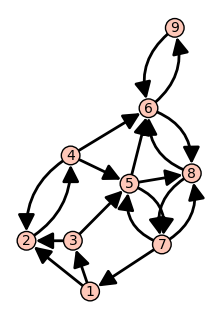

[  0   0   0   0   0   0 1/3   0   0]
[1/2   0 1/2 1/3   0   0   0   0   0]
[1/2   0   0   0   0   0   0   0   0]
[  0   1   0   0   0   0   0   0   0]
[  0   0 1/2 1/3   0   0 1/3   0   0]
[  0   0   0 1/3 1/3   0   0 1/2   1]
[  0   0   0   0 1/3   0   0 1/2   0]
[  0   0   0   0 1/3 1/2 1/3   0   0]
[  0   0   0   0   0 1/2   0   0   0]

In [19]:
WDN1 = Web({1: [3,2], 2: [4], 3: [5,2], 4: [2, 5, 6], 5: [7, 8, 6], 6: [8, 5, 7], 7: [1, 5, 8], 8: [6, 7] })
WDN1.show()
show(WDN1.H)
WDN2 = Web({1: [3,2], 2: [4], 3: [5,2], 4: [2, 5, 6], 5: [7, 8, 6], 6: [8], 7: [1, 5, 8], 8: [6, 7], 9:[6], 10:[6], 11:[6] })
WDN2.show()
show(WDN2.H)
WDN3 = Web({1: [3,2], 2: [4], 3: [5,2], 4: [2, 5, 6], 5: [7, 8, 6], 6: [8,9], 7: [1, 5, 8], 8: [6, 7], 9:[6] })
WDN3.show()
show(WDN3.H)

In [20]:
WDN1.pagerank('google', 'default',200, verbose=False, precision=5)

(0.070562, 0.098483, 0.048739, 0.10246, 0.16709, 0.16511, 0.18287, 0.16469)

In [21]:
WDN2.pagerank('google', 'default',200, verbose=False, precision=5)

(0.056304, 0.075602, 0.037566, 0.077898, 0.094340, 0.20744, 0.15059, 0.25935, 0.013636, 0.013636, 0.013636)

In [22]:
WDN3.pagerank('google', 'default',200, verbose=False, precision=5)

(0.050184, 0.077539, 0.037995, 0.082575, 0.089728, 0.24401, 0.11830, 0.17931, 0.12037)

The third method boosted page 6 the most relative to page 8, and page 6 became the highest ranked page.

The first method ranked page 6 as 0.16511 and page 8 as 0.16469 with page 7 being the highest ranked page.
The second method ranked page 6 as 0.20744 and page 8 as 0.25935. This method did not work because page 6 is still lower than page 8, and page 8 is stayed as the highest ranked page.

## Problem E

Consider the following web diagram, `WDE`, with eight web pages. This diagram consists of two disjoint 'subwebs', both with the same link structure as `WDA`.

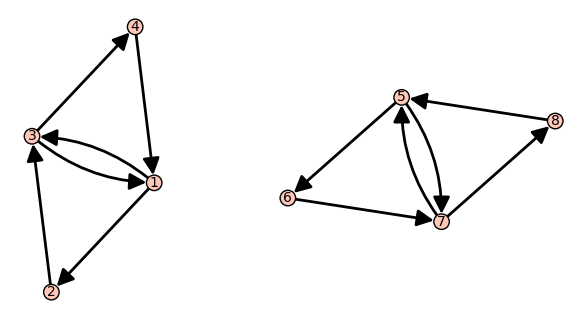

In [23]:
WDE = Web({1: [2,3], 2: [3], 3 : [1, 4], 4 : [1], 5: [6, 7], 6: [7], 7: [5,8], 8: [5]})
WDE.show(6)

- Use the hyperlink matrix for `WDE` and the power method to find the PageRank vector for each of the following initial state vectors:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$I_0 = (1, 0, 0, 0, 0, 0, 0, 0)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$J_0 = (0, 0, 0, 0, 0, 0, 0, 1)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$K_0 = (1/8, 1/8, 1/8, 1/8, 1/8,1/8, 1/8, 1/8)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;You should find that each initial state vector above leads to a different PageRank vector! Give an intuitive explanation for why this happened. 
- Next, find the PageRank vector using each initial state vector above and the standard Google matrix. What did you find?
- To better understand what's going on here, find bases for the $\lambda = 1$ eigenspaces for the hyperlink matrix and the standard Google matrix. Use this to explain the difference between what happened when you used the hyperlink matrix compared to when you used the Google matrix.

In [36]:
V = vector(QQ, [1, 0, 0, 0, 0, 0, 0, 0])
WDE.set_personalization_vector(V)
WDE.pagerank('hyperlink', V, 200, verbose=False, precision=5)

(0.33333, 0.16667, 0.33333, 0.16667, 0.00000, 0.00000, 0.00000, 0.00000)

In [37]:
V = vector(QQ, [0, 0, 0, 0, 0, 0, 0, 1])
WDE.set_personalization_vector(V)
WDE.pagerank('hyperlink', V, 200, verbose=False, precision=5)

(0.00000, 0.00000, 0.00000, 0.00000, 0.33333, 0.16667, 0.33333, 0.16667)

In [38]:
V = vector(QQ, [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8])
WDE.set_personalization_vector(V)
WDE.pagerank('hyperlink', V, 200, verbose=False, precision=5)

(0.16667, 0.083333, 0.16667, 0.083333, 0.16667, 0.083333, 0.16667, 0.083333)

Since the diagram is disconnected, there is only ranking for the first four spots corresponding to page 1 to 4 using initial state vector I. Page 1 and page 3 had ranking that were twice as high as page 2 and 4. The same applies to vector J. 
Vector K assigned equal probability to all pages, so we see all pages were ranked and page 1, 3, 5, 7 ranked higher than page 2, 4, 6, 8.


In [39]:
V = vector(QQ, [1, 0, 0, 0, 0, 0, 0, 0])
WDE.set_personalization_vector(V)
WDE.pagerank('google', V, 200, verbose=False, precision=5)

(0.16228, 0.087719, 0.16228, 0.087719, 0.16228, 0.087719, 0.16228, 0.087719)

In [40]:
V = vector(QQ, [0, 0, 0, 0, 0, 0, 0, 1])
WDE.set_personalization_vector(V)
WDE.pagerank('google', V, 200, verbose=False, precision=5)

(0.16228, 0.087719, 0.16228, 0.087719, 0.16228, 0.087719, 0.16228, 0.087719)

In [48]:
V = vector(QQ, [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8])
WDE.set_personalization_vector(V)
WDE.pagerank('google', V, 200, verbose=False, precision=5)

(0.16228, 0.087719, 0.16228, 0.087719, 0.16228, 0.087719, 0.16228, 0.087719)

Google algorithm ranked the same way for each initial state vector.

In [46]:
WDE.lambda1_basis('hyperlink', precision = 5)

[(0.33333, 0.16667, 0.33333, 0.16667, 0.00000, 0.00000, 0.00000, 0.00000),
 (0.00000, 0.00000, 0.00000, 0.00000, 0.33333, 0.16667, 0.33333, 0.16667)]

In [47]:
WDE.lambda1_basis('google', precision = 5)

[(0.16228, 0.087719, 0.16228, 0.087719, 0.16228, 0.087719, 0.16228, 0.087719)]

Google standard matrix considers the possibility of randomly clicking on one of the pages which ignores the disconnections between 1,2,3,4 and 5,6,7,8. This explains why we see the same importance for page 1,5,3,7 and 2,6,4,8.